# Multipoles

MITCHELL WRIGHT

The field of a single point charge is relatively simple — as far as three-dimensional vector fields go.  What happens as we put more charges together?

Let's use Python to find out.

In [2]:
# Import useful functions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
# Turn on interactive plots.
# %matplotlib notebook

# Turn off interactive plots.
%matplotlib inline

We can use the functions in the `visualizing-fields` notebook.

In [5]:
# Define functions to calculate and plot fields.
def coordinates(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    
    return X, Y, Z

def potential(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    V = q/R
    
    return V

def field(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    Ex = q*(X-x0)/R**3
    Ey = q*(Y-y0)/R**3
    Ez = q*(Z-z0)/R**3
    
    return Ex, Ey, Ez

def draw_field(x,y,z,u,v,w, stride=25):
    """
    Takes coordinate arrays x,y,z and vector field component
    arrays u,v,w and draws a quiver plot where all of the arrows
    have the same length.
    """
    # Create a quiver plot.
    # Use a coarser grid.
    x = X[::stride,::stride,::stride].copy()
    y = Y[::stride,::stride,::stride].copy()
    z = Z[::stride,::stride,::stride].copy()
    ex = Ex[::stride,::stride,::stride].copy()
    ey = Ey[::stride,::stride,::stride].copy()
    ez = Ez[::stride,::stride,::stride].copy()
    
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot(projection='3d')
    ax.quiver3D(x,y,z,ex,ey,ez, pivot='middle', length=0.7, normalize=True, linewidth=0.5, color='red')
    ax.set_title(r"$\vec{E}(\vec{R})$")

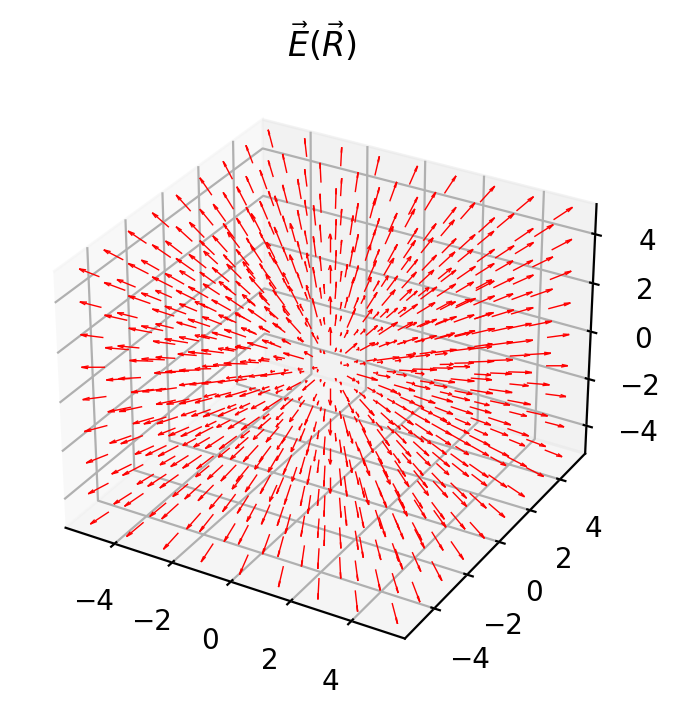

In [6]:
# Draw the field of a point charge at the origin for reference.
X,Y,Z = coordinates()
Ex, Ey, Ez = field()
draw_field(X,Y,Z, Ex,Ey,Ez)

The functions don't require any arguments, but you can supply them to change the behavior.  Let's look at the field of two point charges separated by "2 units".  (We'll talk about units later ...)

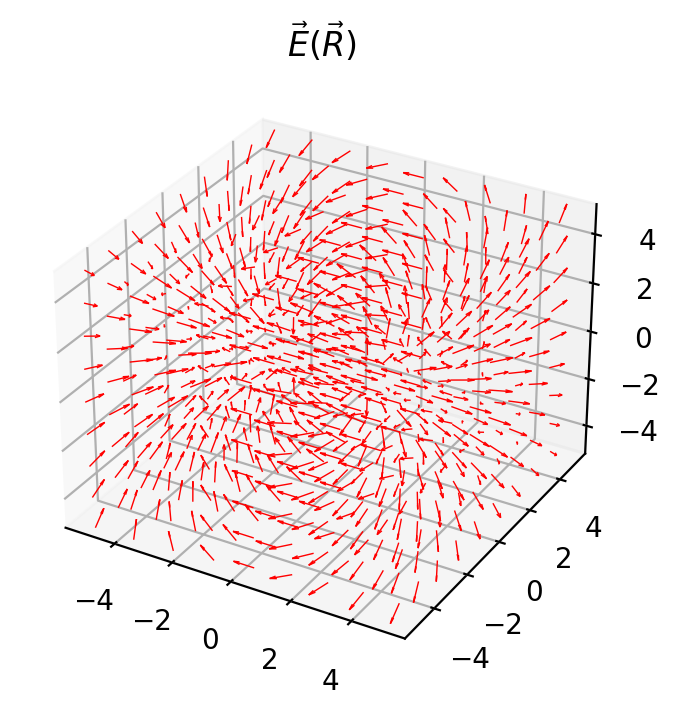

In [8]:
# Charge 1
q1 = +1
x1 = +1
y1 = 0
z1 = 0

# Charge 2
q2 = -1
x2 = -1
y2 = 0
z2 = 0

# Combute combined potential.
V1 = potential(q1, (x1,y1,z1))
V2 = potential(q2, (x2,y2,z2))

# Compute combined field.
E1 = np.stack(field(q1, (x1,y1,z1)))
E2 = np.stack(field(q2, (x2,y2,z2)))

Ex, Ey, Ez = E1 + E2

draw_field(X,Y,Z, Ex, Ey,Ez)

Describe the pattern.  How is it similar to what you observed with a single point charge?  Are there any significant difference?

The pattern all spreads outward from the center point of the point charge. This is simular to a single point charge in that it spreads out from a single point in the center. I do not recall any significant differences.

Change the value of `q2` above to `-1` and replot.  What changes?  How is it similar to what you observed with a single point charge?  Are there any significant difference?

It looks like we created to charges. One is positive and one is negative much like a north and south pole. It has two points of charge now and the magnetic field curls. Its different than a single point charge because it curls back in on itself. A single point charge was purlely a gradient and projected outward only.

# Dipoles and Quadrupoles

A point charge creates a "monopole" field pattern.  The pattern you just observed is called a "dipole" field.  There are "quadrupoles" and "octupoles" and "hexadecapoles" ... and more.  The patterns can be difficult to interpret in three dimensions, so we will focus our attention on a 2D slice through the plane where the charges are located.

Let's look at the dipole again.

In [ ]:
# Turn off interactive plotting for now.
%matplotlib inline

In [32]:
# Define functions to calculate and plot fields.
def coordinates_2d(charge=1, location=(0,0), box_size=5, grid_points=201, epsilon=1e-6):
    s = np.linspace(-box_size, box_size, grid_points)
    X,Y = np.meshgrid(s,s, indexing='ij')
    
    return X, Y

def potential_2d(charge=1, location=(0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y = np.meshgrid(s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + epsilon**2)
    V = q/R
    
    return V

def field_2d(charge=1, location=(0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y = np.meshgrid(s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + epsilon**2)
    Ex = q*(X-x0)/R**3
    Ey = q*(Y-y0)/R**3
    
    return Ex, Ey

def draw_field_2d(X,Y,U,V, stride=10):
    """
    Takes coordinate arrays x,y,z and vector field component
    arrays u,v,w and draws a quiver plot where all of the arrows
    have the same length.
    """
    # Create a quiver plot.
    # Use a coarser grid.
    x = X[::stride,::stride].copy()
    y = Y[::stride,::stride].copy()
    u = U[::stride,::stride].copy()
    v = V[::stride,::stride].copy()
    
    # Make all arrows the same length.
    w = np.sqrt(u**2 + v**2 + 1e-6)
    u /= w
    v /= w
    
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot()
    ax.quiver(x,y,u,v, pivot='middle', linewidth=0.5, color='green', minlength=1)
    ax.set_title(r"$\vec{E}(\vec{R})$")
    ax.axis('equal')

Let's look at the field of a point charge located at the origin in this representation.

<IPython.core.display.Javascript object>


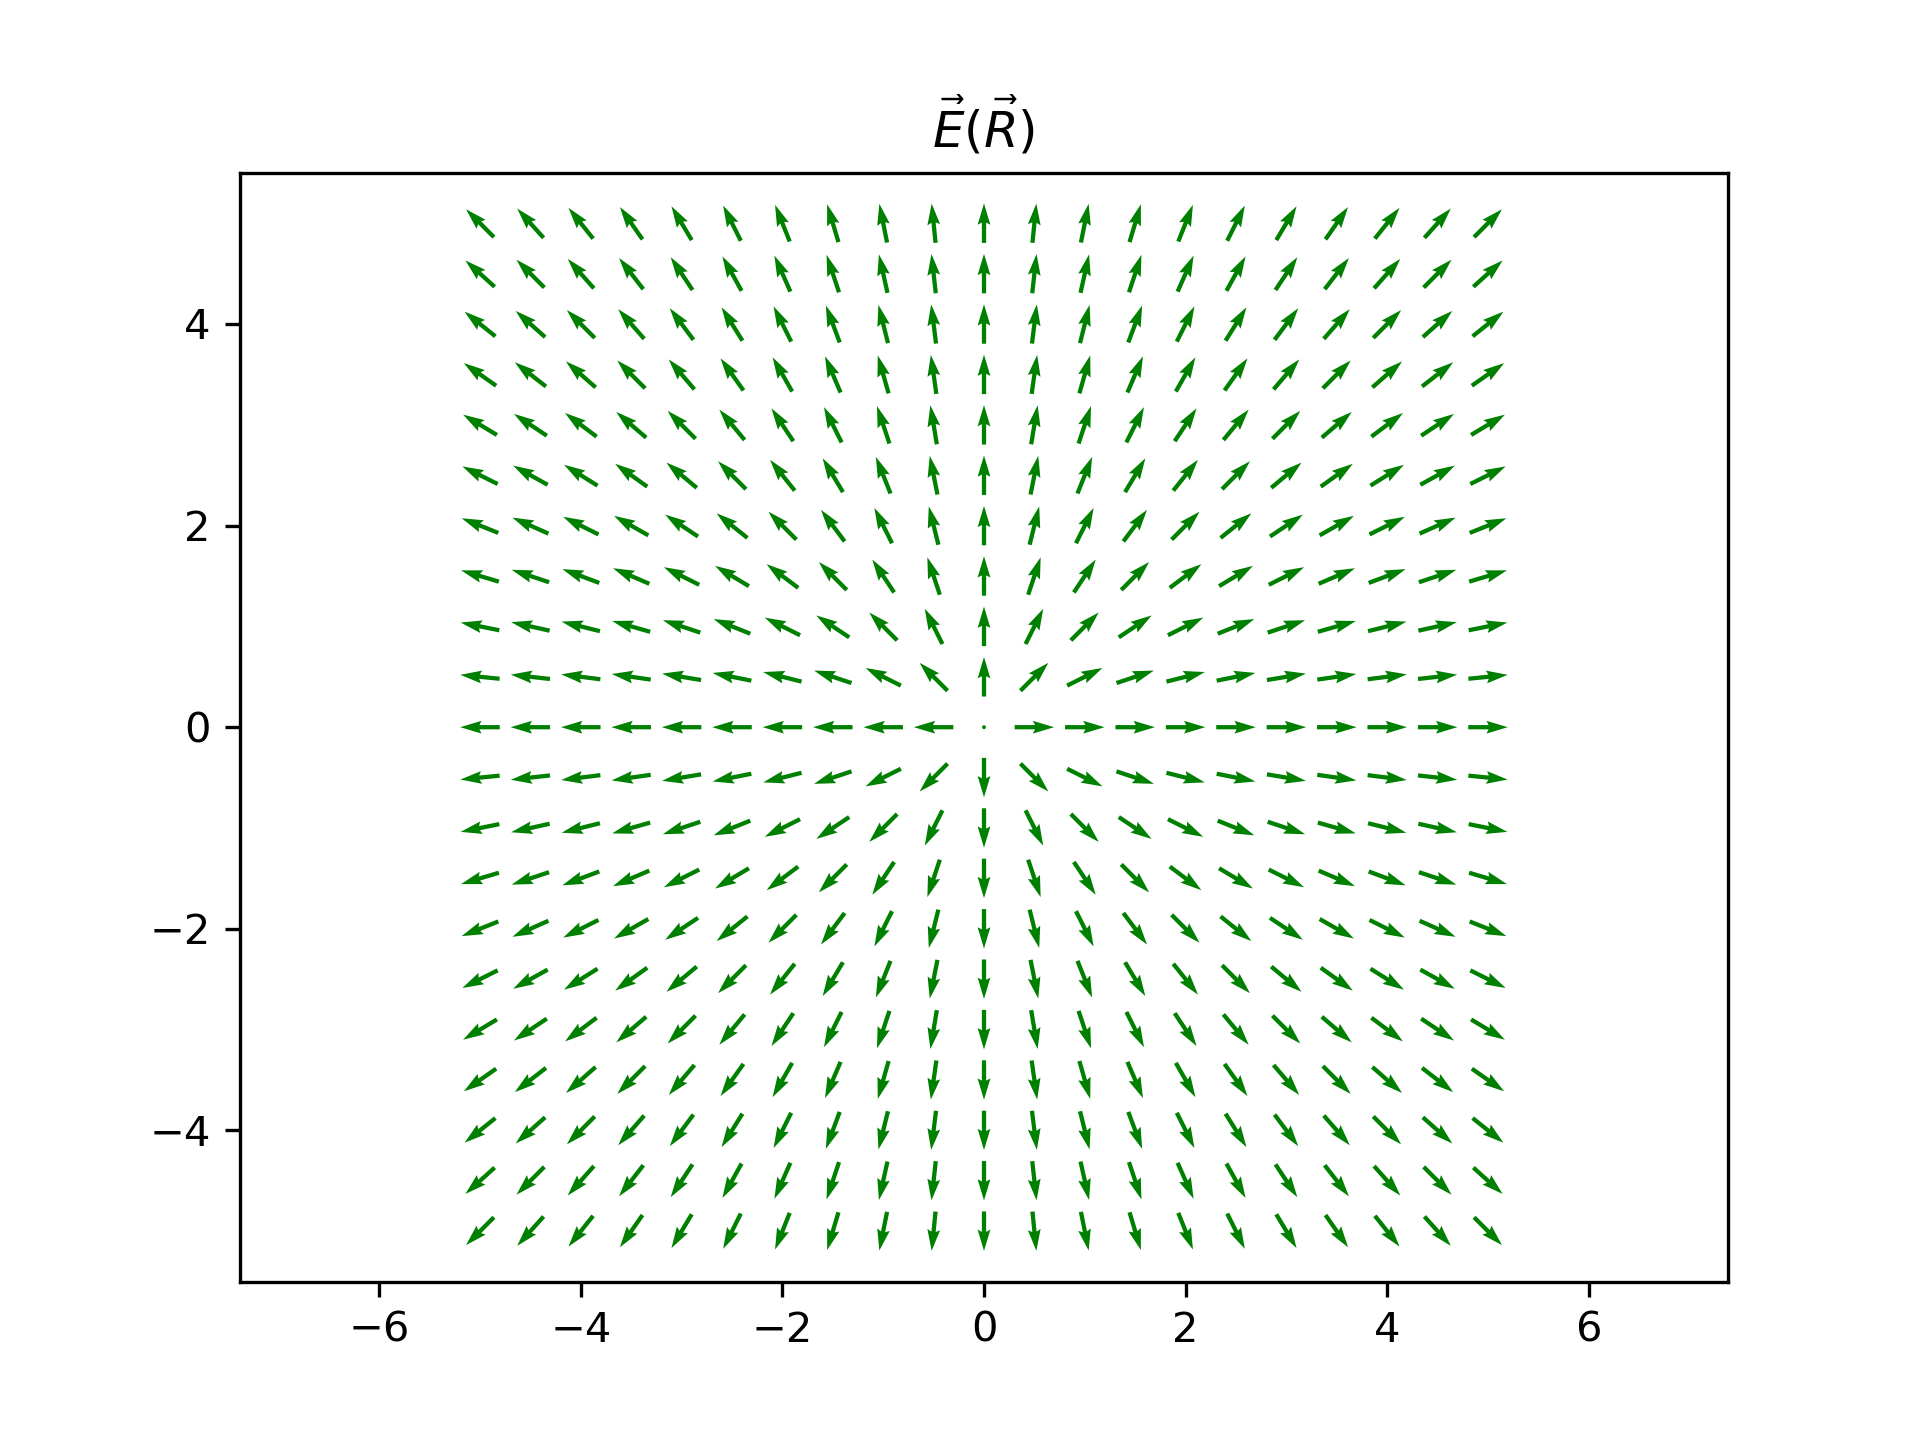

In [33]:
X,Y = coordinates_2d()
Ex,Ey = field_2d()
draw_field_2d(X,Y,Ex,Ey)

## Dipole

Change the values and locations of the charges below.

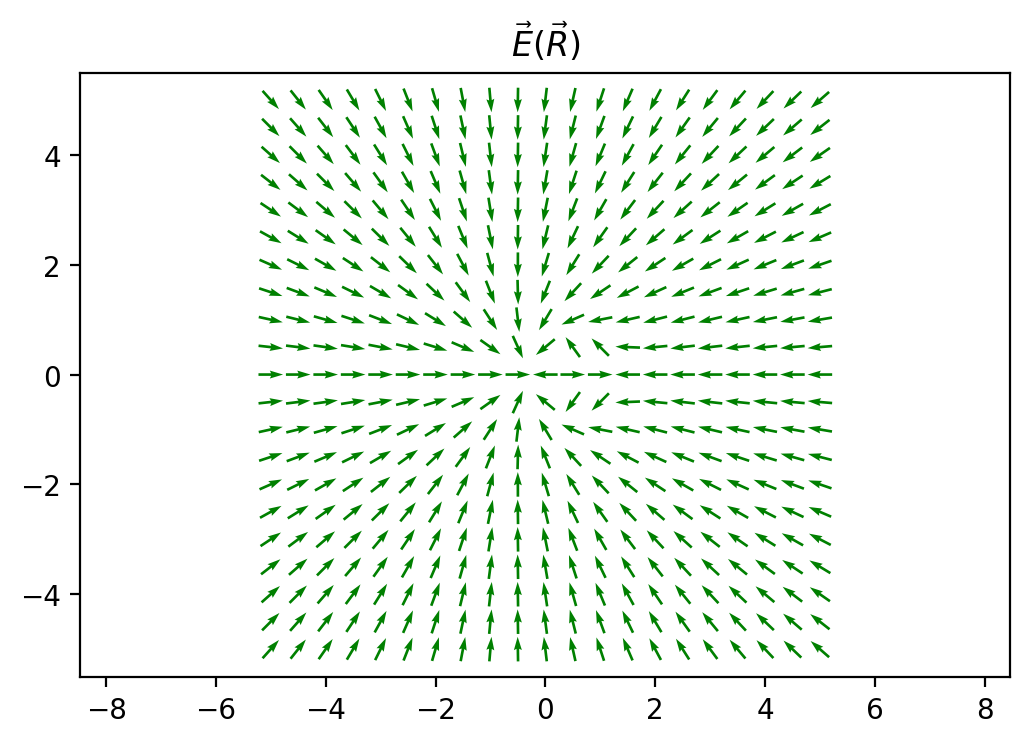

In [13]:
q1 = +1
x1 = +0.2
y1 = 0

q2 = -2
x2 = -0.2
y2 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2)))
draw_field_2d(X,Y,Ex,Ey)

What patterns or trends do you notice when the charges have the same sign?  What happens near the charges?  What happens farther away?

When the charges have the same sign they all point to the center because its negative. I wonder what this can be used for. The charges are the center of attraction. The further away the weaker it gets (I'm assuming).

What patterns or trends do you notice when the charges have the opposite sign and different magnitudes?  What happens near the charges?  What happens farther away?

When the charges have opposite sign they are attracted to each other and the other will curl into the other. The magnitudes increase the size of the curl area. The area near the charges becomes a region at which the field is attracted to it. Nothing seems to change depending on how far away it is because it is always attracted to the point of attracting charge.

What patterns or trends do you notice when the charges have the opposite sign and equal magnitudes?  What happens near the charges?  What happens farther away?

This is the same question twice.


## Quadrupole

The field created by two charges of equal magnitude and opposite sign that are very close together is called a ***dipole***.

We can combine two dipoles to make a new kind of patterns.  Try the following.

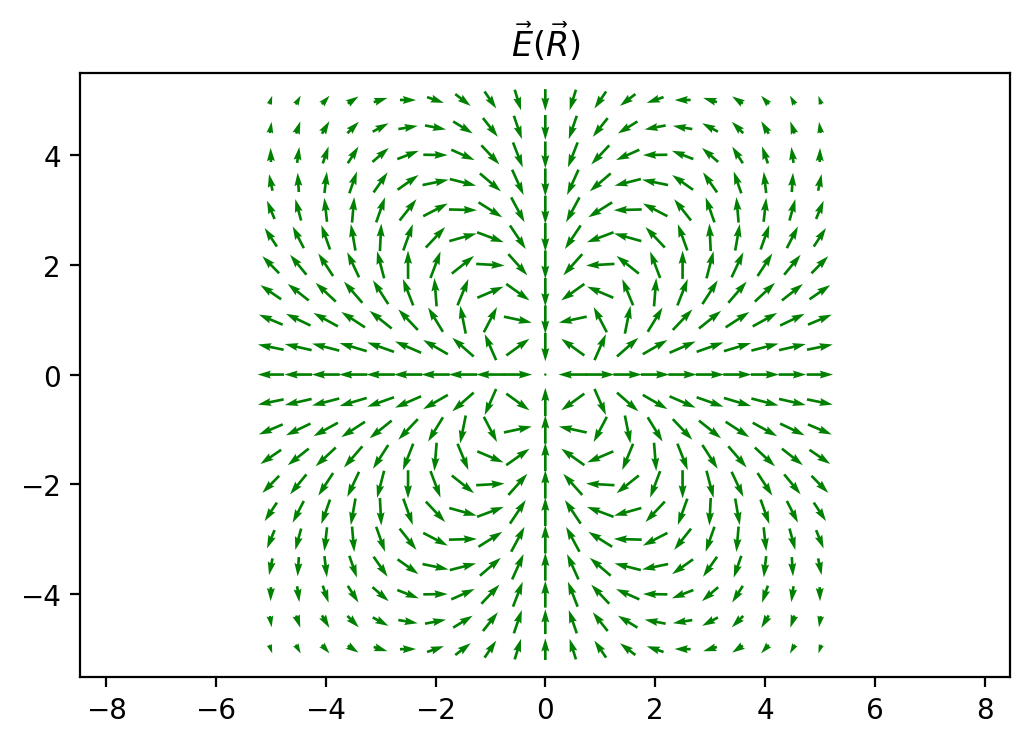

In [14]:
# (A) Two dipoles, pointing directly at each other.
q1 = +1
x1 = +0.5
y1 = 0

q2 = -2.0
x2 = 0
y2 = 0

q3 = +1
x3 = -0.5
y3 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) + np.stack(field_2d(q3, (x3,y3)))
draw_field_2d(X,Y,Ex,Ey)

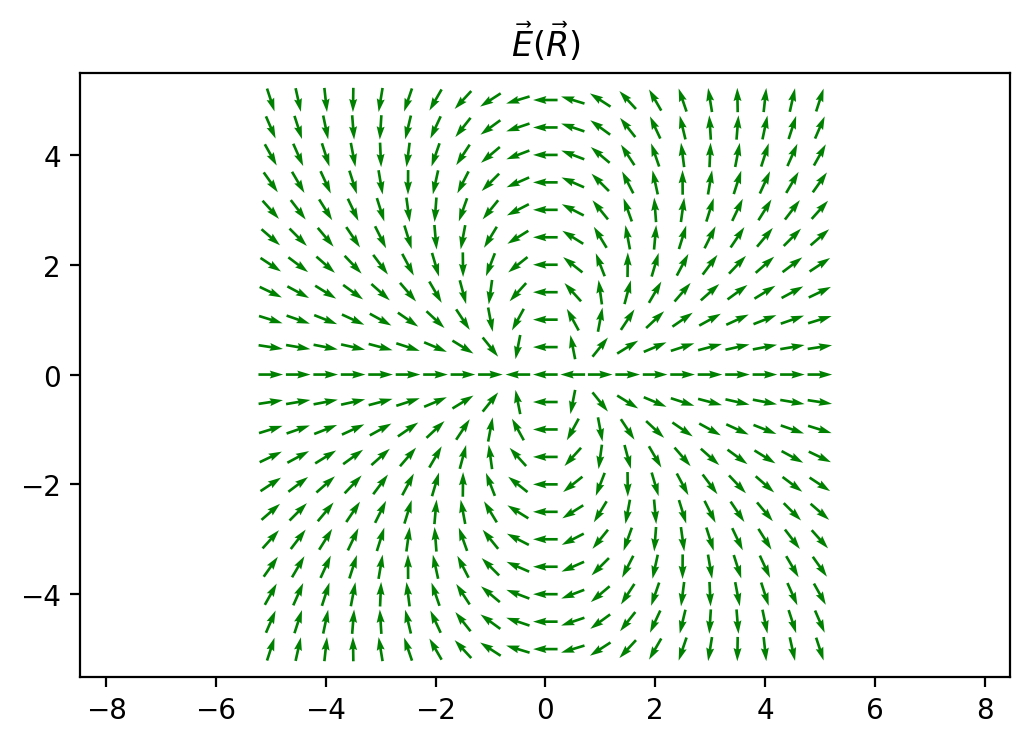

In [16]:
# (B) Two dipoles, end to end.
q1 = +1
x1 = +0.5
y1 = 0

q2 = 0
x2 = 0
y2 = 0

q3 = -1
x3 = -0.5
y3 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) + np.stack(field_2d(q3, (x3,y3)))
draw_field_2d(X,Y,Ex,Ey)

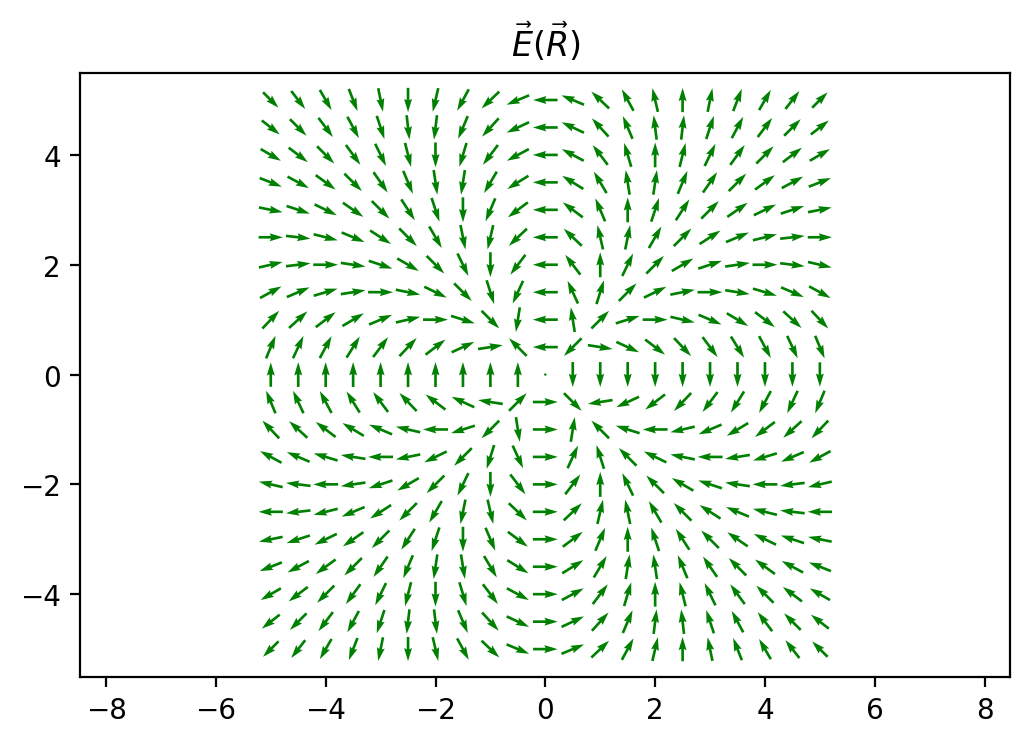

In [17]:
# (C) Two dipoles, pointing in opposite directions, but separated.
q1 = +1
x1 = +0.5
y1 = +0.5

q2 = -1
x2 = +0.5
y2 = -0.5

q3 = -1
x3 = -0.5
y3 = +0.5

q4 = +1
x4 = -0.5
y4 = -0.5

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) \
        + np.stack(field_2d(q3, (x3,y3))) + np.stack(field_2d(q4, (x4,y4)))
draw_field_2d(X,Y,Ex,Ey)

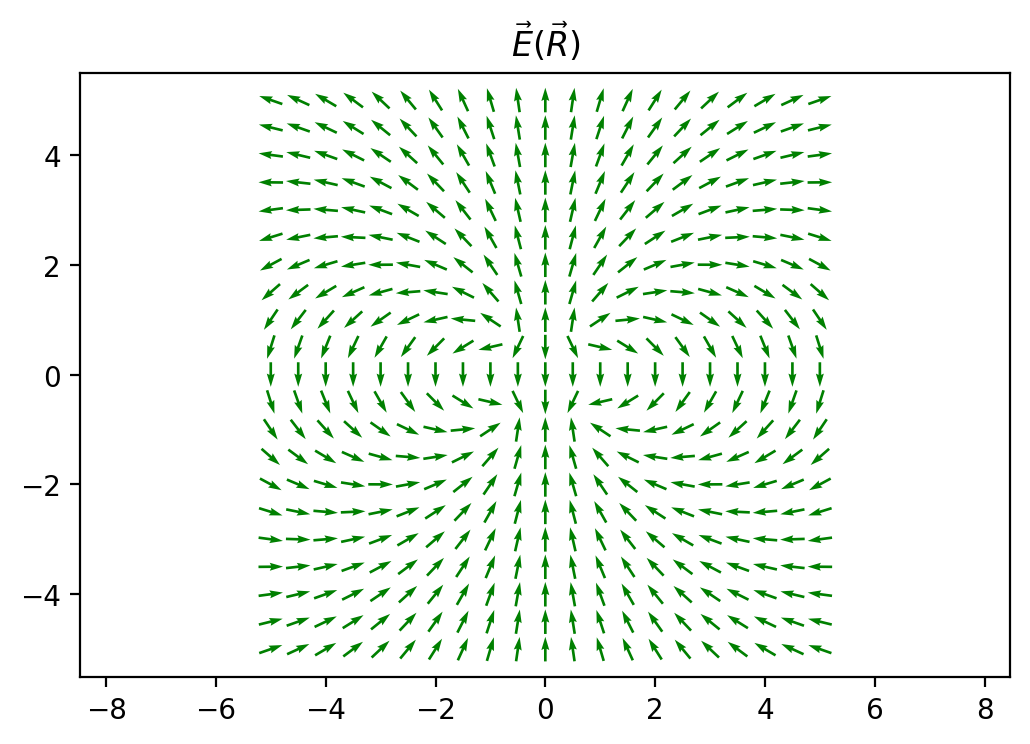

In [15]:
# (C) Two dipoles, pointing in the same direction, but separated.
q1 = +1
x1 = +0.5
y1 = +0.5

q2 = -1
x2 = +0.5
y2 = -0.5

q3 = +1
x3 = -0.5
y3 = +0.5

q4 = -1
x4 = -0.5
y4 = -0.5

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) \
        + np.stack(field_2d(q3, (x3,y3))) + np.stack(field_2d(q4, (x4,y4)))
draw_field_2d(X,Y,Ex,Ey)

Some of these fields are *dipole* fields and some are *quadrupole* fields.  Which are dipole fields?  Which are quadrupole?  How can you tell?  Where do you think the names come from?

Di means two and quad means four so simply having two poles makes a dipole and four poles makes a quadpole. The dipole has a top and bottom while the quadrupole has two on the top and two on the bottom side by side.

# Further Exploration

Try at least one of the following.

## Tripole

We saw monopole, dipole, and quadrupole fields.  Can you create a tripole field?

Copy one of the field plotting cells below and tinker with the charges and locations.

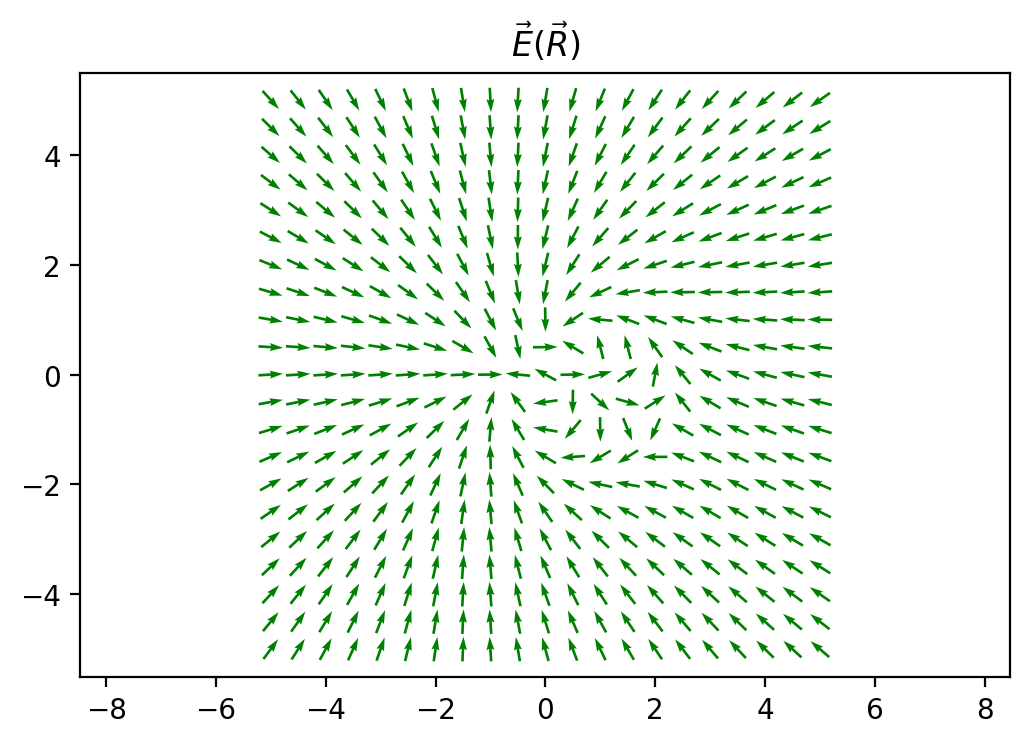

In [23]:
# (B) Two dipoles, end to end.
q1 = +1
x1 = +0.4
y1 = 0

q2 = -1
x2 = 0.1
y2 = 0.5

q3 = -1
x3 = -0.8
y3 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) + np.stack(field_2d(q3, (x3,y3)))
draw_field_2d(X,Y,Ex,Ey)

What did you find?

Its very odd but yes a tripole can theoretically exist if given the right conditions.

## Streamlines

Refer to the streamlines example from the `visualizing-fields` notebook.  Adapt the code there to produce similar plots for (A) a dipole field and (B) a quadrupole field.

In [25]:
# Make a 2D plot of a slice of the field.
z0 = 180
z_val = Z[0,0,z0]

# Use a coarser grid.
stride = 1
x = X[::stride,::stride,z0].copy().T
y = Y[::stride,::stride,z0].copy().T
ex = Ex[::stride,::stride,z0].copy().T
ey = Ey[::stride,::stride,z0].copy().T

# Set max length to improve visibility in plot.
ecut = 3
ex[ex>ecut] = ecut
ey[ey>ecut] = ecut
ex[ex<-ecut] = -ecut
ey[ey<-ecut] = -ecut

fig = plt.figure(dpi=200)
ax = fig.add_subplot()
ax.streamplot(x,y,ex,ey, linewidth=0.5, density=1.5)
ax.set_title("Projection of field onto plane at z=%g" % z_val)
ax.axis("scaled")

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

Which representation seems most useful to you?  Why?

I'm getting an error on the code for this one when I copy and paste it so I am going to have to skip that one in the interest of time. However I think the representations this assignment was already using is better than the streamlines because the streamlines don't show you a whole lot of information in my opinion.

## Coding Challenge: Slider

There is a thrid notebook in this folder: `slider-example.`  It illustrates how to add a slider to a plot — effectively an interactive animation.

Try to adapt this example to one of the plots you've created this week.  For example, you could ...

- Add a slider to a dipole plot that controls the separation of the charges.
- Add a slider to a heatmap of the potential that controls the z-coordinate of the slice.
- Implement your own idea for something cool!

I am not sure how to figure this one out so I have to move on. But I did experiment with putting the two together.

<IPython.core.display.Javascript object>


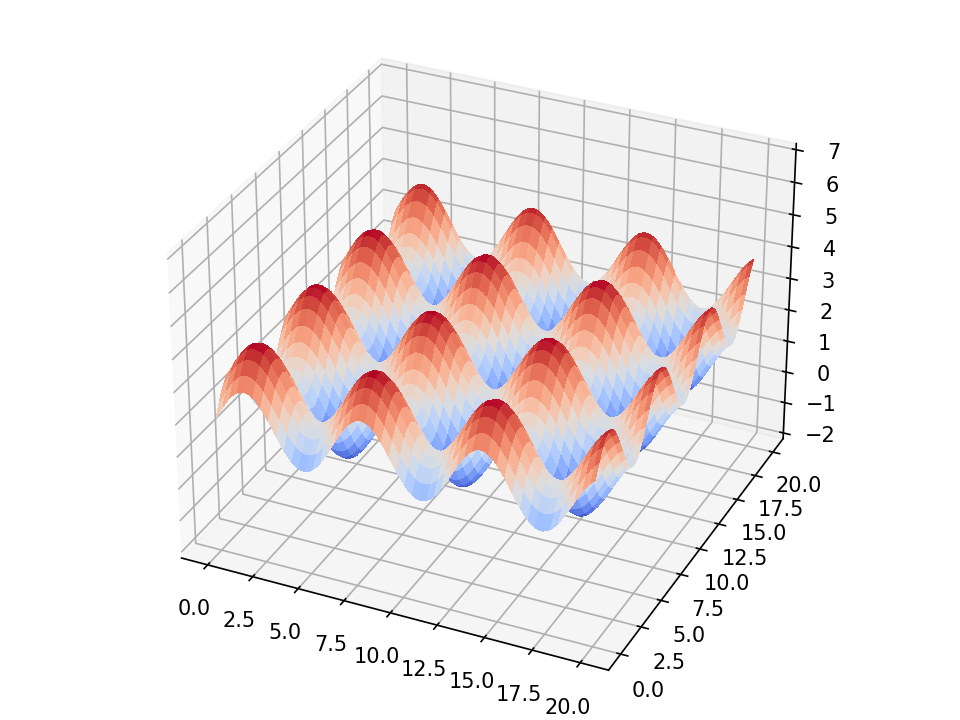

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.widgets import Slider

%matplotlib notebook

# (A) Two dipoles, pointing directly at each other.
q1 = +1
x1 = +0.5
y1 = 0

q2 = -2.0
x2 = 0
y2 = 0

q3 = +1
x3 = -0.5
y3 = 0

fig = plt.figure()

ax1 = fig.add_axes([0, 0, 1, 1.0], projection = '3d')
ax2 = fig.add_axes([0.1, 1.5, 0.8, 0.1])

s = Slider(ax = ax2, label = 'value', valmin = 0, valmax = 5, valinit = 2)

def update(val):
    value = s.val
    ax1.cla()
    ax1.plot_surface(x, y, z + value, cmap = cm.coolwarm, linewidth = 2, antialiased = False)
    ax1.set_zlim(-2, 7)

s.on_changed(update)
update(0)

plt.show()